In [2]:
!pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.0 MB/s eta 0:00:00


In [5]:
!pip install ultralytics
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.150 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/107.7 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display,Image

In [8]:
from google.colab import drive

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd /content/drive/MyDrive/YOLO

/content/drive/MyDrive/YOLO


In [11]:
!ls

data  Untitled0.ipynb


Training the model

In [13]:
%cd /content/drive/MyDrive/YOLO

!yolo task=detect mode=train model=yolov8s.pt data = data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/YOLO
100% 21.5M/21.5M [00:02<00:00, 11.0MB/s]
Ultralytics YOLOv8.0.150 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

In [14]:
!ls runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch120.jpg
events.out.tfevents.1691601559.4f8f737de9d7.6102.0  train_batch121.jpg
F1_curve.png					    train_batch122.jpg
labels_correlogram.jpg				    train_batch1.jpg
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    weights
results.csv


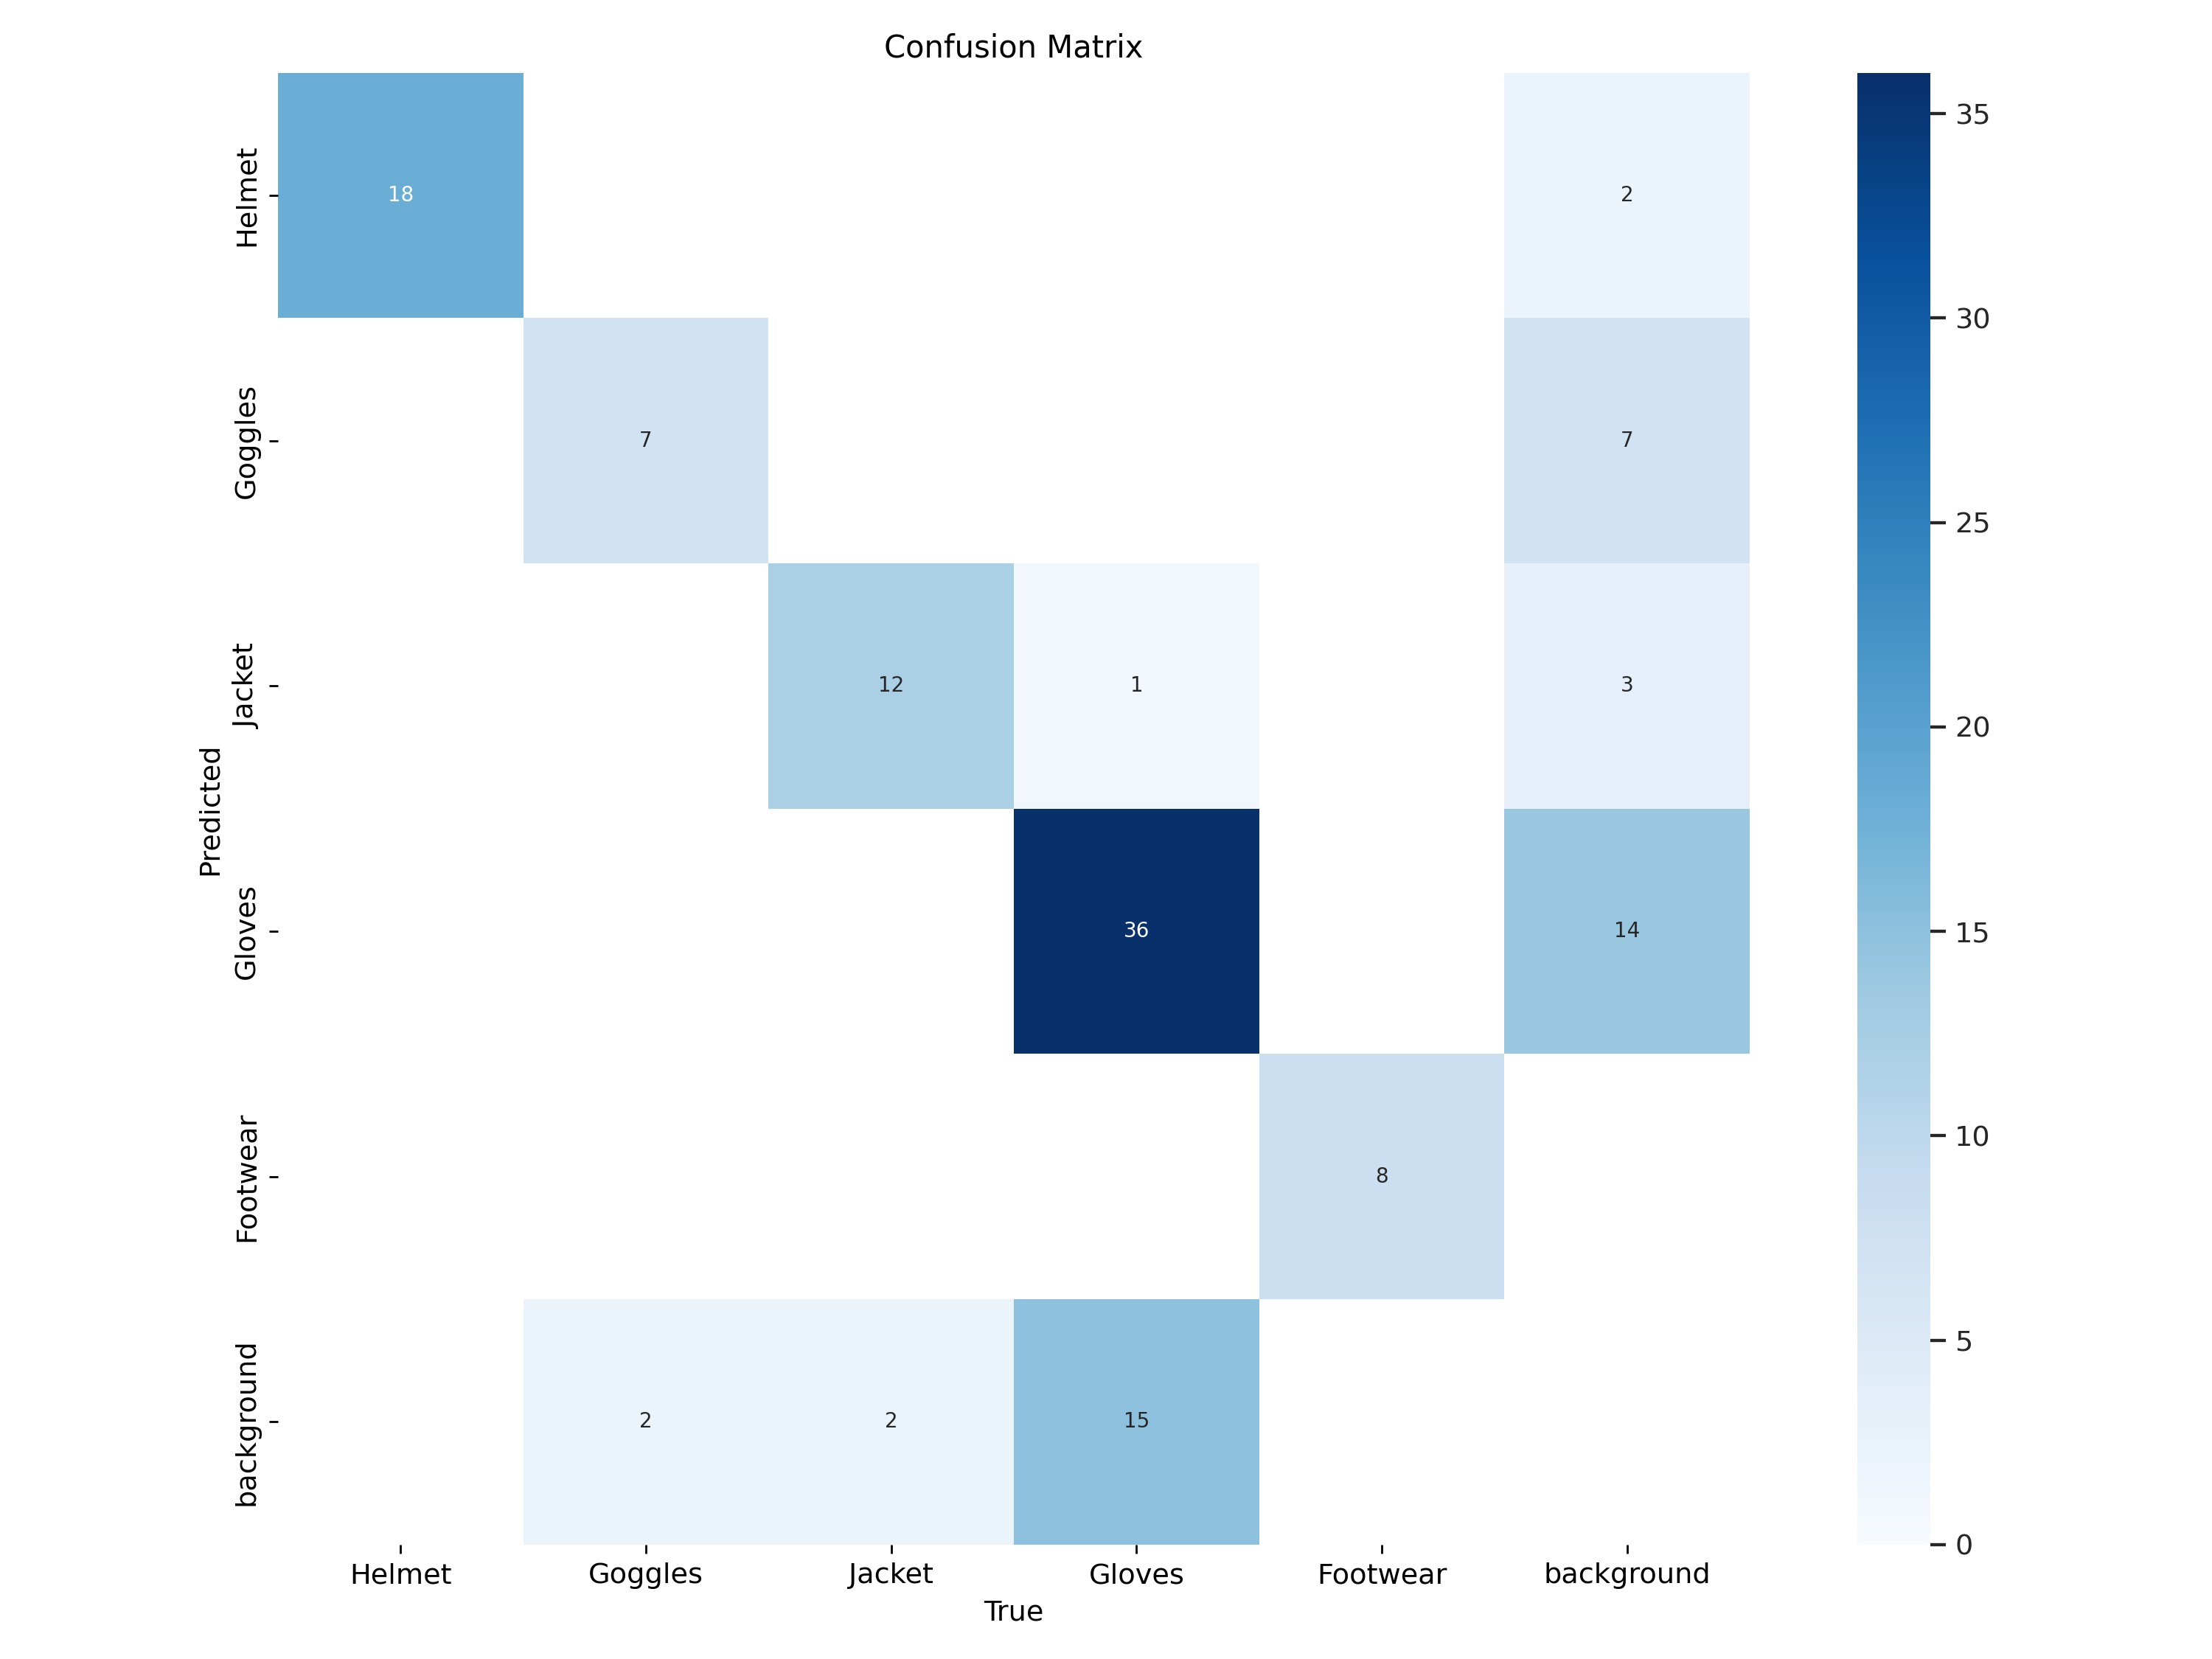

In [15]:
Image(filename ='runs/detect/train/confusion_matrix.png',width = 600)

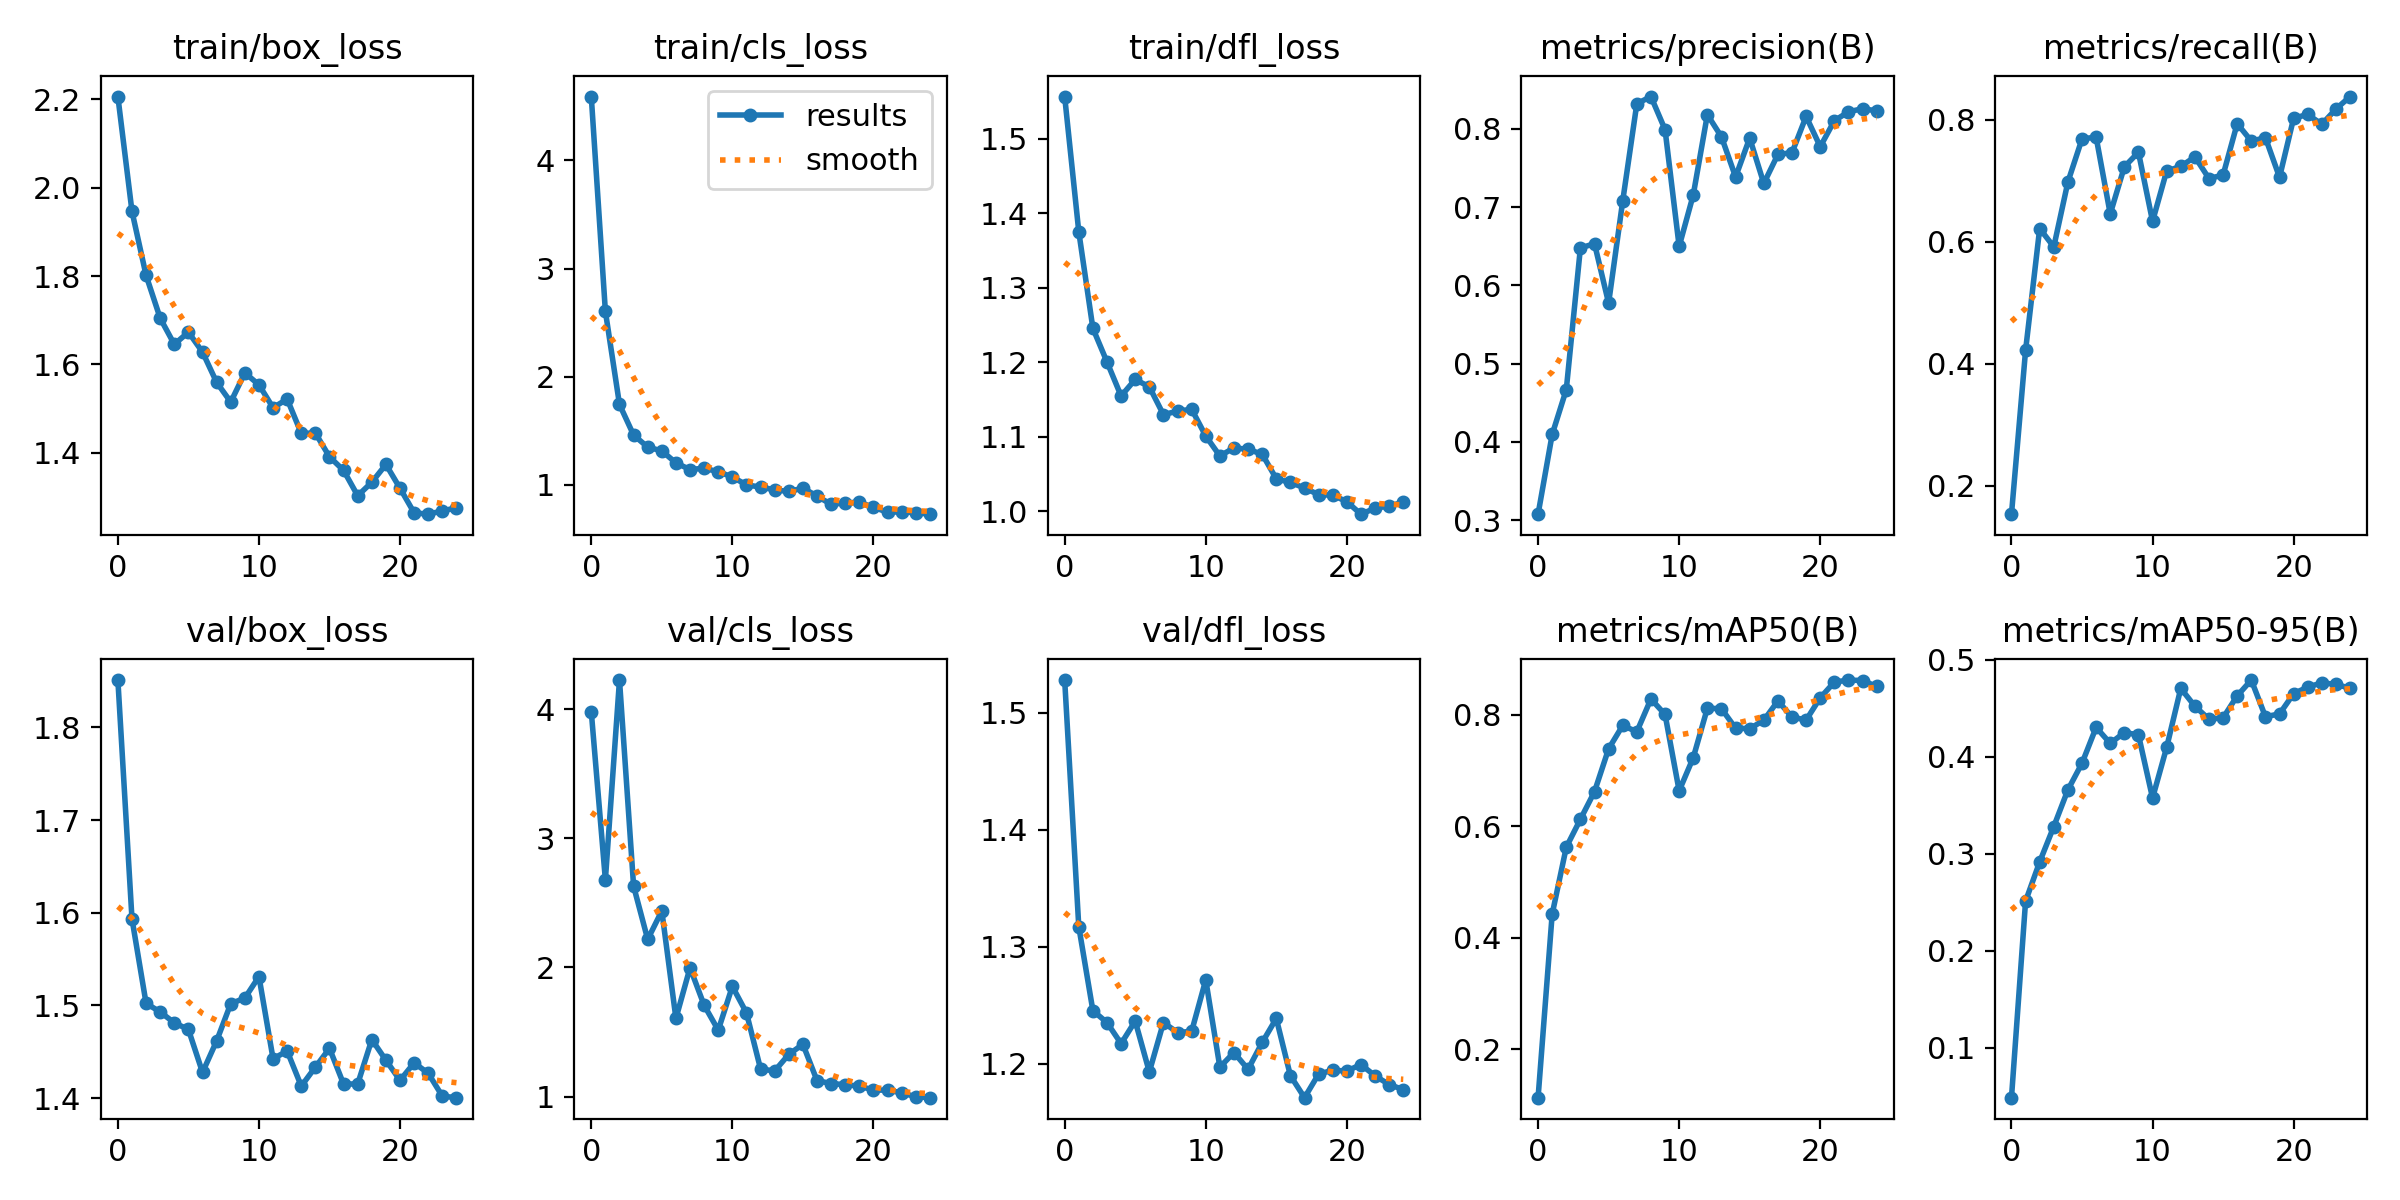

In [17]:
Image(filename ='runs/detect/train/results.png',width = 600)

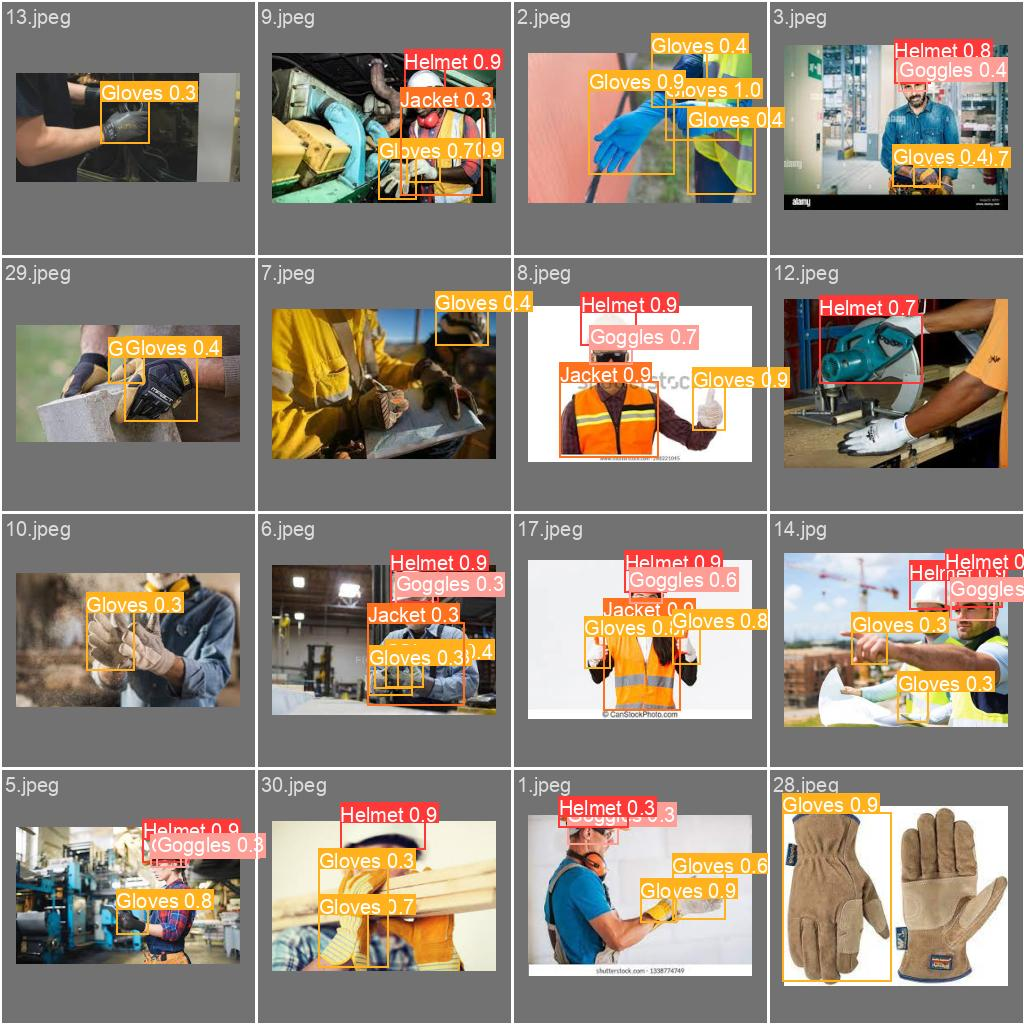

In [18]:
Image(filename = 'runs/detect/train/val_batch0_pred.jpg',width = 600)

validating the model

In [19]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.150 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/YOLO/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:06<00:00,  3.47s/it]
                   all         31        101      0.818      0.823      0.859      0.468
                Helmet         31         18      0.854          1      0.948      0.641
               Goggles         31          9      0.735      0.778      0.762      0.312
                Jacket         31         14      0.779      0.714      0.859      0.595
                Gloves         31         52      0.724      0.635      0.733      0.402
              Footwear         31          8          1       0.99      0.995      0.391
Speed: 1.2ms preprocess, 194.5ms inference, 0.0ms loss,

In [20]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.0.150 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients

image 1/31 /content/drive/MyDrive/YOLO/data/test/images/1.jpeg: 192x224 1 Helmet, 1 Goggles, 2 Glovess, 85.8ms
image 2/31 /content/drive/MyDrive/YOLO/data/test/images/10.jpeg: 160x224 (no detections), 75.1ms
image 3/31 /content/drive/MyDrive/YOLO/data/test/images/11.jpeg: 224x224 1 Jacket, 1 Gloves, 95.3ms
image 4/31 /content/drive/MyDrive/YOLO/data/test/images/12.jpeg: 192x224 1 Helmet, 78.9ms
image 5/31 /content/drive/MyDrive/YOLO/data/test/images/13.jpeg: 128x224 1 Gloves, 62.5ms
image 6/31 /content/drive/MyDrive/YOLO/data/test/images/14(1).jpeg: 224x224 (no detections), 87.7ms
image 7/31 /content/drive/MyDrive/YOLO/data/test/images/14.jpg: 192x224 3 Helmets, 1 Gloves, 80.4ms
image 8/31 /content/drive/MyDrive/YOLO/data/test/images/15.jpeg: 224x224 1 Gloves, 90.7ms
image 9/31 /content/drive/MyDrive/YOLO/data/test/images/16.jpeg: 224

In [21]:
import glob

In [23]:
from IPython.display import Image,display

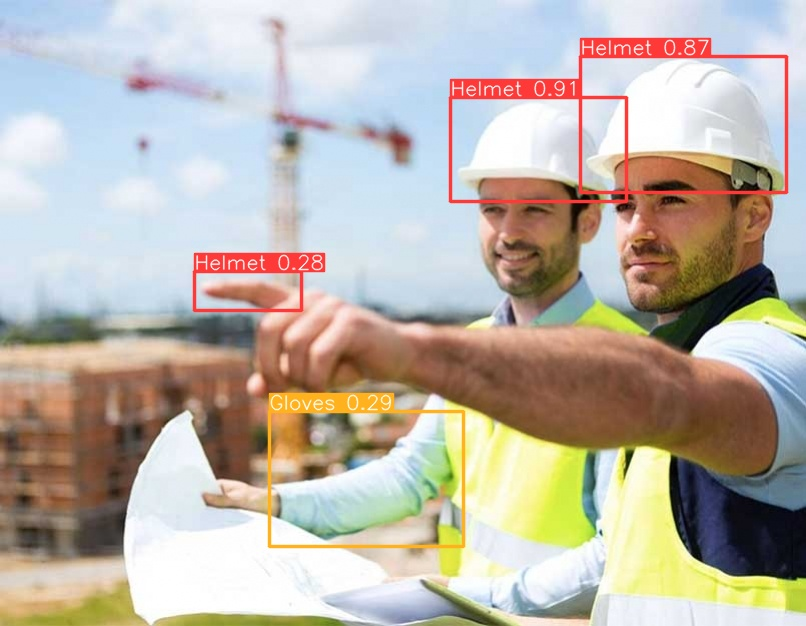

In [24]:
for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
  display(Image(filename = image_path,width = 600))
  print("\n")